Jenna Ferguson, Ian McIntosh, Julia Peitsch, Cassie Ren

# Probability Practice
### Part A

Variables we know! 
* P(Y) = 0.65            
* P(N) = 0.35
* P(RC) = 0.3
* P(TC) - 0.7
* P(Y|RC) = 0.5

Find P(Y|TC)

$$P(Y) = P(Y|RC)*P(RC) + P(Y|TC)*P(TC)$$
$$0.65 = (0.5)(0.3) + P(Y|TC)*(0.7)$$
$$0.50 = 0.7*P(Y|TC)$$
$$P(Y|TC) = 0.714$$

71.4% of people who are Truthful Clickers answered yes


### Part B

The variables we already know are:
* P(+|D) = 0.993 --> P(-|D) = 0.007
* P(-|N) = 0.9999 --> P(+|N) = 0.0001
* P(D) = 0.000025
* P(ND) = 0.999975 

We need to use Baye's theorem and the law of probability to calculate the probability that someone who tests positive has the disease. 

$$P(D|+) = (P(D) * P(+|D))/P(+)$$ 

To find P(+), we use the equation $$P(+) = P(+|D)*P(D) + P(+|ND)*P(ND)$$
$$P(+) = (0.993)*(0.000025) + (0.0001)(0.999975)$$

In [1]:
pos = 0.993*0.000025 + 0.0001*0.999975
pos

0.0001248225

We then use this value to fill out the rest of the Bayes Theorem 
$$P(D|+) = (P(D) * P(+|D))/P(+)$$ 
$$P(D|+) = (0.000025 * 0.993)/0.0001248225$$ 

In [2]:
(0.000025*0.993)/pos

0.19888241302649762

The probability that someone has the disease given that they test positive is 0.1988824

# Wrangling the Billboard Top 100

### Part A

In [7]:
# importing necessary packages
import pandas as pd
# reading in csv
data = pd.read_csv('billboard.csv')
# group by performer and song, take the max number of weeks on the chart for each individual song in data frame
counts = data.groupby(['performer','song'])['weeks_on_chart'].agg(['max'])
# sort the values in descending order, take only top 10, reset the index
counts = counts.sort_values(by = 'max', ascending = False).head(10).reset_index()
# change column values to correct names
counts.columns = ['perfomer', 'song', 'count']
# look at data frame to make sure everything looks right
counts

perfomer  \
0                            Imagine Dragons   
1                                 AWOLNATION   
2                                 The Weeknd   
3                                 Jason Mraz   
4                                LeAnn Rimes   
5  LMFAO Featuring Lauren Bennett & GoonRock   
6                                OneRepublic   
7                                      Jewel   
8                                      Adele   
9                           Carrie Underwood   

                                  song  count  
0                          Radioactive     87  
1                                 Sail     79  
2                      Blinding Lights     76  
3                            I'm Yours     76  
4                        How Do I Live     69  
5                    Party Rock Anthem     68  
6                       Counting Stars     68  
7  Foolish Games/You Were Meant For Me     65  
8                  Rolling In The Deep     65  
9                     Before He Cheats     64

The table above shows the 10 songs that have spent the most weeks on the Billboard Top 100. The table lists the singer, song title and number of weeks on the Billboard Top 100 for each of the 10 songs.

### Part B

<Axes: title={'center': 'Unique Songs in Billboard Top 100 Per Year'}, xlabel='Year', ylabel='Unique Songs in Billboard Top 100'>

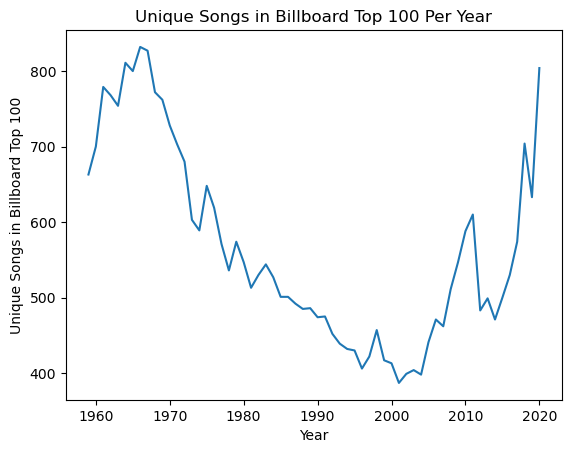

In [8]:
# group by year and count the number of distinct songs for that year
years = data.groupby(['year'])['song_id'].nunique()
# get rid of 1958 and 2021
years = years.loc[1959:2020]
# plot how many unique songs were in the Billboard Top 100 for each year, label axes
years.plot(kind = 'line', xlabel = 'Year', ylabel = 'Unique Songs in Billboard Top 100', title = 'Unique Songs in Billboard Top 100 Per Year')

The figure above shows the number of unique songs in the Billboard Top 100 for each year. The plot shows the year on the X axis and the number of unique songs in the Billboard Top 100 that year on the Y axis. We can see that there was an increase in the number of unique songs during the 1960s, followed by a sharp decrease in the 1970s, 1980s and 1990s. The 2000s finally saw a reversal of this trend with an increase in the number of unique songs. During the 2010s, there was initially a sharp decrease, before a large increase during the latter half of the decade. The 2010s have now produced the highest levels on unique songs since the 1960s.

### Part C

<Axes: title={'center': 'Artists With More Than 30 Ten-Week Hits'}, xlabel='Artist', ylabel='Number of Ten-Week Hits'>

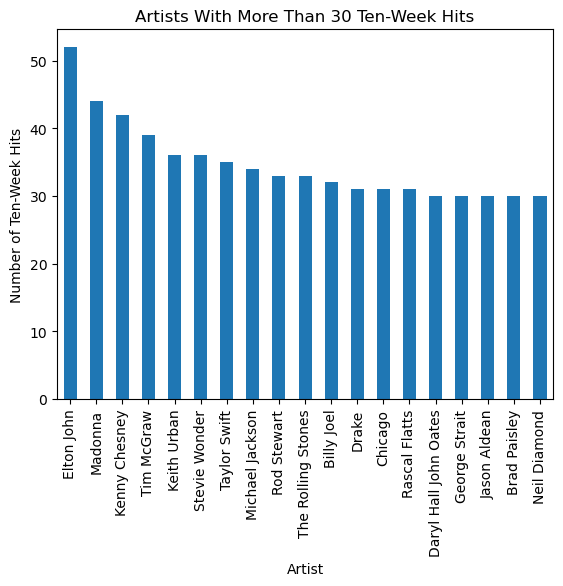

In [9]:
# group by performer and song and take the max number of weeks for each to get individual songs
counts = data.groupby(['performer','song'])['weeks_on_chart'].agg(['max'])
# take only songs that were on the charts for 10 weeks or more
counts = counts[counts['max'] >= 10].reset_index()
# group by performer and count the number of songs for each performer
performers = counts.groupby(['performer'])['song'].agg(['count'])
# take only performers with more than 30 ten-week hits, and sort by the number of ten-week hits they have
performers = performers[performers['count'] >= 30].sort_values(by = 'count', ascending = False)
# Plot the performers with at least 30 ten-week hits, give title and labels axes
performers.plot(kind = 'bar', xlabel = 'Artist', ylabel = 'Number of Ten-Week Hits', legend = False, title = 'Artists With More Than 30 Ten-Week Hits')

The figure above shows all artists who have more than 30 ten-week hits on the Billboard top 100. A ten-week hit is a song that stays in the Billboard top 100 for at least 10 weeks. The X axis shows each artist with at least 30 ten-week hits, and the Y axis shows the number of ten-week hits each artist has.

# Visual story telling part 1: green buildings


In [10]:
# read in data frame
data = pd.read_csv("greenbuildings.csv")
data

CS_PropertyID  cluster     size  empl_gr    Rent  leasing_rate  stories  \
0            379105        1   260300     2.22   38.56         91.39       14   
1            122151        1    67861     2.22   28.57         87.14        5   
2            379839        1   164848     2.22   33.31         88.94       13   
3             94614        1    93372     2.22   35.00         97.04       13   
4            379285        1   174307     2.22   40.69         96.58       16   
...             ...      ...      ...      ...     ...           ...      ...   
7889         157117     1230  1300000     1.15  137.51        100.00       41   
7890         158379     1230    16140     1.15  152.73         75.22        8   
7891          52316     1230    15726     1.15  158.92        100.00        6   
7892         158124     1230    51300     1.15  198.99        100.00       12   
7893         157086     1230  1876972     1.15  250.00         99.84       45   

      age  renovated  class_a  ...  green_rating  net  amenities  cd_total_07  \
0      16          0        1  ...             1    0          1         4988   
1      27          0        0  ...             0    0          1         4988   
2      36          1        0  ...             0    0          1         4988   
3      46          1        0  ...             0    0          0         4988   
4       5          0        1  ...             0    0          1         4988   
...   ...        ...      ...  ...           ...  ...        ...          ...   
7889   35          0        1  ...             0    0          0         1299   
7890   90          1        0  ...             0    0          0         1299   
7891   67          0        0  ...             0    0          0         1299   
7892   91          0        0  ...             0    0          0         1299   
7893   34          1        1  ...             0    0          1         1299   

      hd_total07  total_dd_07  Precipitation  Gas_Costs  Electricity_Costs  \
0             58         5046          42.57   0.013700           0.029000   
1             58         5046          42.57   0.013731           0.029045   
2             58         5046          42.57   0.013731           0.029045   
3             58         5046          42.57   0.013731           0.029045   
4             58         5046          42.57   0.013731           0.029045   
...          ...          ...            ...        ...                ...   
7889        4796         6095          48.35   0.011757           0.045457   
7890        4796         6095          48.35   0.011757           0.045457   
7891        4796         6095          48.35   0.011757           0.045457   
7892        4796         6095          48.35   0.011757           0.045457   
7893        4796         6095          48.35   0.011757           0.045457   

      cluster_rent  
0            36.78  
1            36.78  
2            36.78  
3            36.78  
4            36.78  
...            ...  
7889         58.72  
7890         58.72  
7891         58.72  
7892         58.72  
7893         58.72  

[7894 rows x 23 columns]

One possible confounding variable is leasing rate. There is a chance the rent is higher in buildings that are green, but these buildings are less occupied, meaning they would actually bring in less rent per month. To check for this counfounding we will create a column called total rent, which multiplies rent and leasing rate to find the actual rent per square foot each building will bring in.

<Axes: title={'center': 'Average Monthly Rent for Green vs. Non-Green Buildings'}, xlabel='Green', ylabel='Average Monthly Rent'>

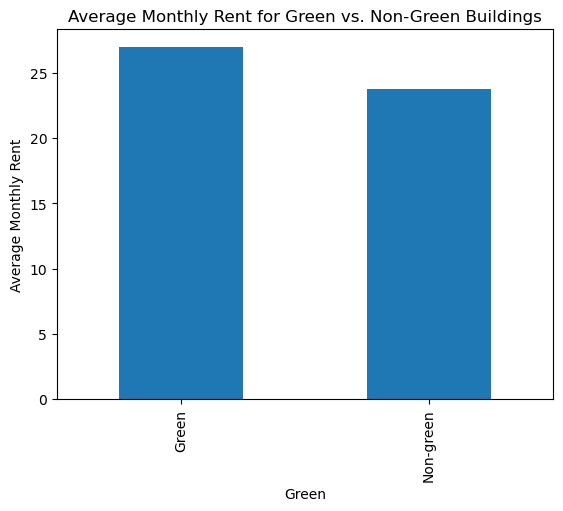

In [11]:
# find average monthly rent per square foot
data['total_rent'] = data['Rent'] * data['leasing_rate']/100
# split data frame into green and non-green buildings
green = data[data['green_rating'] == 1]
nongreen = data[data['green_rating'] != 1]
# create dataframe
average_monthly_rent = pd.DataFrame({'green': ['Green', 'Non-green'], 'rent' : [green['total_rent'].mean(), nongreen['total_rent'].mean()]})
# plot dataframe
average_monthly_rent.plot(x = 'green', y = 'rent', kind = 'bar', xlabel = 'Green', ylabel = 'Average Monthly Rent', title = 'Average Monthly Rent for Green vs. Non-Green Buildings', legend = False)

This figure shows the different monthly rents, adjusted for occupancy, per square foot for green and non-green buildings. Average monthly rent, adjusted for occupancy, is calculated by multiplying the rent per square foot with the leasing rate. The figure supports the analysis of the stats guru because it backs up his claim that people are willing to pay a premium on rent for green buildings. It also shows that the premium is not significantly less when accounting for occupancy, which could have been a confounding variable if green buildings were charging more but having less tenants.

Another possible confounding variable is square footage. There is a chance the rent is higher in buildings that are non-green at certain sizes, but not at all sizes. To check for this counfounding we will only look at buldings that are a similar size to our building in question. Our building will be 250,000 sq. ft. so we will look at buildings between 200,000 and 300,000 sq. ft.

<Axes: title={'center': 'Average Monthly Rent for Green vs. Non-Green Buildings'}, xlabel='Green', ylabel='Average Monthly Rent'>

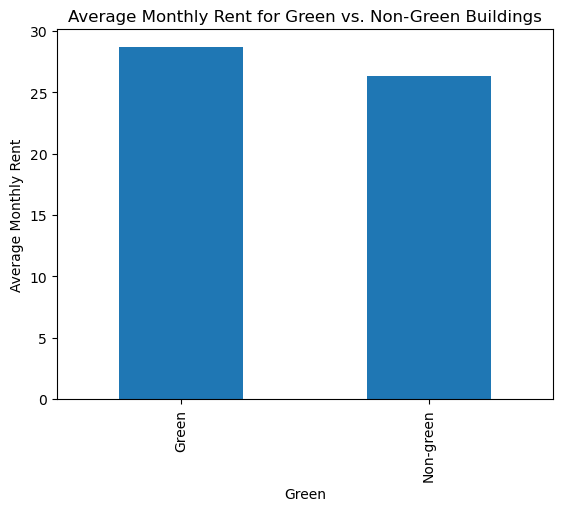

In [12]:
# take only buildings in the correct size range
newData = data[(data['size'] > 200000) & (data['size'] < 300000)]
# split data frame into green and non-green buildings
green = newData[newData['green_rating'] == 1]
nongreen = newData[newData['green_rating'] != 1]
# create dataframe
average_monthly_rent = pd.DataFrame({'green': ['Green', 'Non-green'], 'rent' : [green['total_rent'].mean(), nongreen['total_rent'].mean()]})
# plot dataframe
average_monthly_rent.plot(x = 'green', y = 'rent', kind = 'bar', xlabel = 'Green', ylabel = 'Average Monthly Rent', title = 'Average Monthly Rent for Green vs. Non-Green Buildings', legend = False)

This figure shows the different monthly rents per square foot for green and non-green buildings between 200,000 and 300,000 sq. ft. The figure supports the analysis of the stats guru because it backs up his claim that people are willing to pay a premium on rent for green buildings of this size. It also shows that the premium for green buildings of this size is not significantly less than it is for green buildings as a whole, which could have been a confounding variable if green buildings were charging less at sizes closer to the size of our building.

Another possible confounding variable is age. There is a chance the rent is higher in buildings that are green because they are newer, and non-green buildings tend to charge more when they are the same age. To check for this counfounding we will only look at buldings that are a similar age to our building in question. Our building will be brand new. so we will look at buildings built within the last decade.

<Axes: title={'center': 'Average Monthly Rent for Green vs. Non-Green Buildings'}, xlabel='Green', ylabel='Average Monthly Rent'>

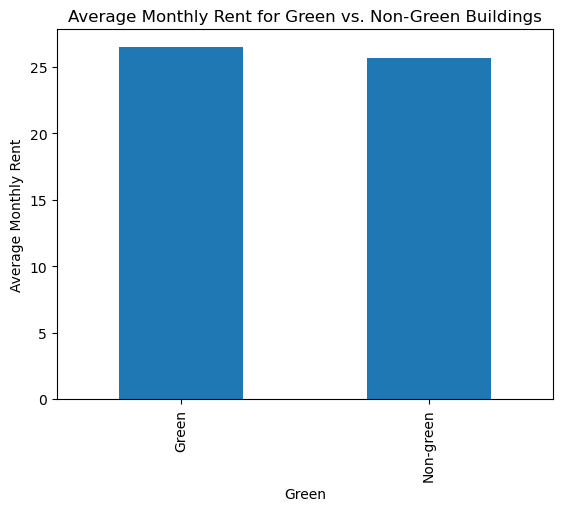

In [14]:
# take only buildings in the correct age range
newData = data[(data['age'] < 10)]
# split data frame into green and non-green buildings
green = newData[newData['green_rating'] == 1]
nongreen = newData[newData['green_rating'] != 1]
# create dataframe
average_monthly_rent = pd.DataFrame({'green': ['Green', 'Non-green'], 'rent' : [green['total_rent'].mean(), nongreen['total_rent'].mean()]})
# plot dataframe
average_monthly_rent.plot(x = 'green', y = 'rent', kind = 'bar', xlabel = 'Green', ylabel = 'Average Monthly Rent', title = 'Average Monthly Rent for Green vs. Non-Green Buildings', legend = False)

This figure shows the different monthly rents per square foot for green and non-green buildings built within the last 10 years.  The figure somewhat supports the analysis of the stats guru because it backs up his claim that people are still willing to pay a small premium on rent for green buildings built in the last 10 years. However, it also shows that premium for green buildings of this age is less than it is for green buildings as a whole, meaning it is possibly a confounding variable.

Another possible confounding variable is height. There is a chance the rent is higher in buildings that are non-green at a certain height, but not at all heights. To check for this counfounding we will only look at buldings that are a similar size to our building in question. Our building will be 15 stories so we will look at buildings between 10 and 20 stories.

<Axes: title={'center': 'Average Monthly Rent for Green vs. Non-Green Buildings'}, xlabel='Green', ylabel='Average Monthly Rent'>

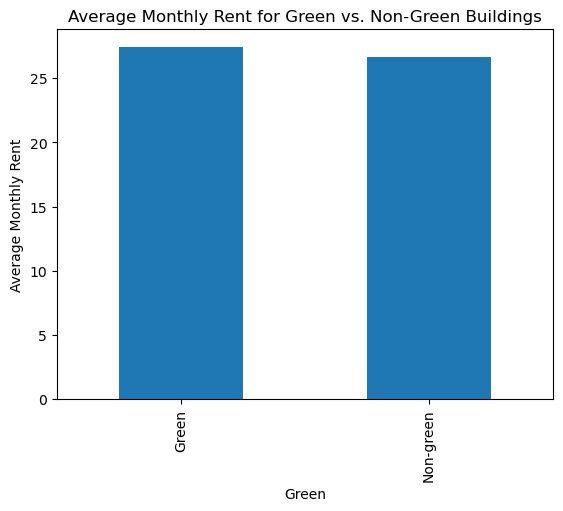

In [16]:
# take only buildings in the correct height range
newData = data[(data['stories'] > 10) & (data['stories'] < 20)]
# split data frame into green and non-green buildings
green = newData[newData['green_rating'] == 1]
nongreen = newData[newData['green_rating'] != 1]
# create dataframe
average_monthly_rent = pd.DataFrame({'green': ['Green', 'Non-green'], 'rent' : [green['total_rent'].mean(), nongreen['total_rent'].mean()]})
# plot dataframe
average_monthly_rent.plot(x = 'green', y = 'rent', kind = 'bar', xlabel = 'Green', ylabel = 'Average Monthly Rent', title = 'Average Monthly Rent for Green vs. Non-Green Buildings', legend = False)

This figure shows the different monthly rents per square foot for green and non-green buildings that are between 10 and 20 stories. The figure somewhat supports the analysis of the stats guru because it backs up his claim that people are still willing to pay a small premium on rent for green buildings that are around the same height as our 15 story building. However, it also shows that premium for green buildings of this heihgt is less than it is for green buildings as a whole, meaning it is possibly a confounding variable.

To understand the whole story, and decide if we fully agree with the stats guru, we should account for the effects of both confounding variables together. To see this we will only look at buildings between 10 and 20 stories that were built in the last decade.

<Axes: title={'center': 'Average Monthly Rent for Green vs. Non-Green Buildings'}, xlabel='Green', ylabel='Average Monthly Rent'>

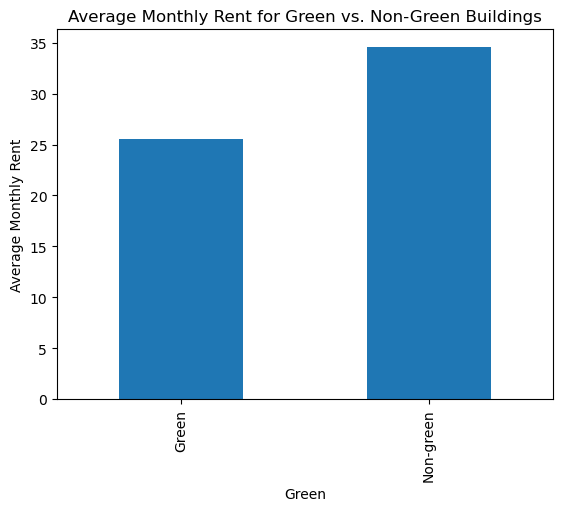

In [17]:
# take only buildings in the correct age range
newData = data[(data['age'] < 10)]
# take only buildings in the correct height range
newData = newData[(newData['stories'] > 10) & (newData['stories'] < 20)]
# split data frame into green and non-green buildings
green = newData[newData['green_rating'] == 1]
nongreen = newData[newData['green_rating'] != 1]
# create dataframe
average_monthly_rent = pd.DataFrame({'green': ['Green', 'Non-green'], 'rent' : [green['total_rent'].mean(), nongreen['total_rent'].mean()]})
# plot dataframe
average_monthly_rent.plot(x = 'green', y = 'rent', kind = 'bar', xlabel = 'Green', ylabel = 'Average Monthly Rent', title = 'Average Monthly Rent for Green vs. Non-Green Buildings', legend = False)

This figure shows the different monthly rents per square foot for green and non-green buildings that are between 10 and 20 stories and were built within the last ten years. Here we can the extreme confounding effects of the age and height of the buildings when looked at together. The figure refutes the analysis of the stats guru because it undermines his claim that people are still willing to pay a small premium on rent for green buildings that are around the same height and age as our brand new 15 story building. Therefore, I have to disagree with the conclusions of the stats guru, and say that it is not a good financial decision to build the green building.

# Visual story telling part 2: Capital Metro data


In [19]:
#read in dataframe
data = pd.read_csv("capmetro_UT.csv")
data

timestamp  boarding  alighting day_of_week  temperature  \
0     2018-09-01 06:00:00         0          1         Sat        74.82   
1     2018-09-01 06:15:00         2          1         Sat        74.82   
2     2018-09-01 06:30:00         3          4         Sat        74.82   
3     2018-09-01 06:45:00         3          4         Sat        74.82   
4     2018-09-01 07:00:00         2          4         Sat        74.39   
...                   ...       ...        ...         ...          ...   
5819  2018-11-30 20:45:00        43         29         Fri        70.73   
5820  2018-11-30 21:00:00        24         19         Fri        69.88   
5821  2018-11-30 21:15:00        33         16         Fri        69.88   
5822  2018-11-30 21:30:00        25         15         Fri        69.88   
5823  2018-11-30 21:45:00        21         13         Fri        69.88   

      hour_of_day month  weekend  
0               6   Sep  weekend  
1               6   Sep  weekend  
2               6   Sep  weekend  
3               6   Sep  weekend  
4               7   Sep  weekend  
...           ...   ...      ...  
5819           20   Nov  weekday  
5820           21   Nov  weekday  
5821           21   Nov  weekday  
5822           21   Nov  weekday  
5823           21   Nov  weekday  

[5824 rows x 8 columns]

We will first simply look at how many people get on and off the bus during an average day.

<Axes: title={'center': ' Number of People Boarding or Alighting Cap Metro Bus Throughout Day'}, xlabel='Time', ylabel='Number of People'>

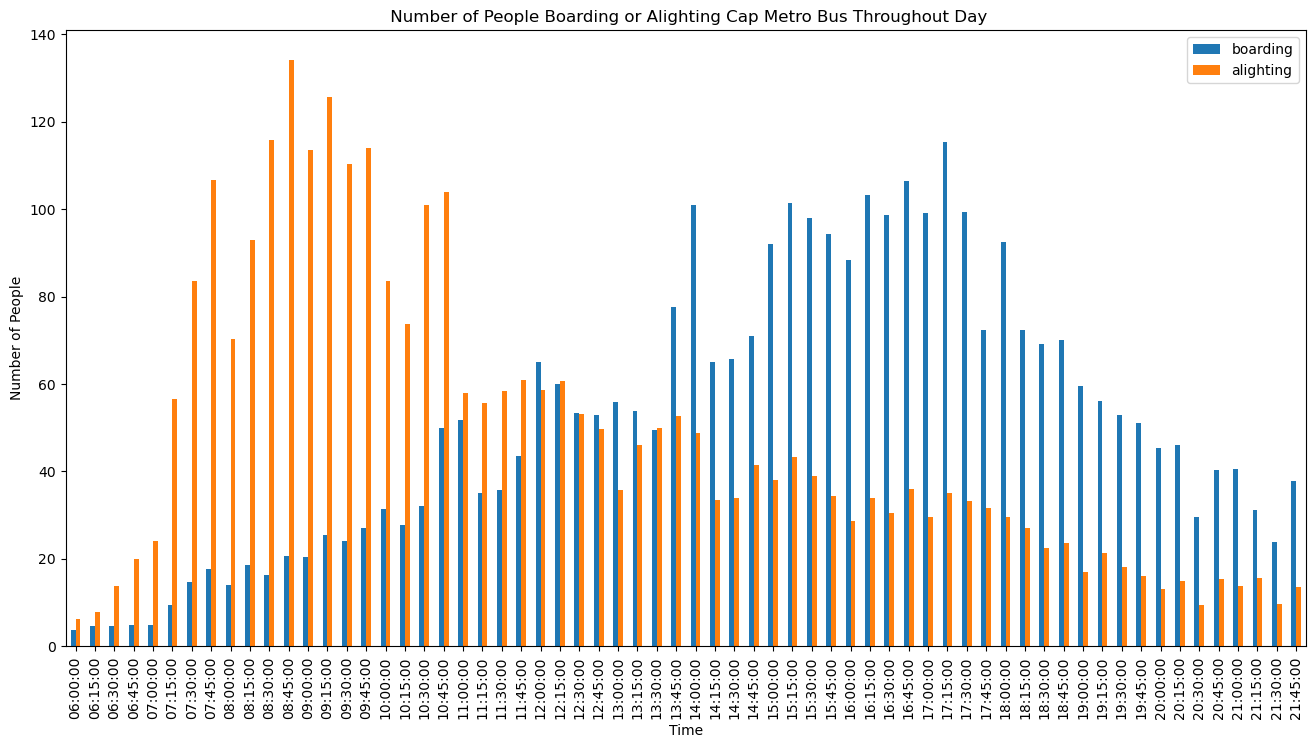

In [20]:
# get the series of all times data is recorded for
times = data['timestamp']
# take only the time of day
data['time'] = data['timestamp'].apply(lambda x: x[11:])
# get the average number of people getting on and off the bus for each hour of the day
data2 = data.groupby(['time'])['boarding'].agg(['mean'])
data3 = data.groupby(['time'])['alighting'].agg(['mean'])
# merge the dataframe with average number of people getting on and average number of people getting off during each hour of the day
data4 = data2.merge(data3, on = 'time')
# rename columns
data4.columns = ['boarding', 'alighting']
# plot the number of people getting on and off the bus each hour of the day
data4.plot(kind = 'bar',  fontsize = 10, figsize = (16,8), xlabel = 'Time', ylabel = 'Number of People', title = ' Number of People Boarding or Alighting Cap Metro Bus Throughout Day')

We can see that the majority of people are getting off the bus in the morning, with the most people getting off the bus at 08:45 A.M. We can also see that during the middle of the day the number of people getting on the bus passes the number of people getting off the bus. In the afternooon the majority of people are getting off the bus, with the most people getting off the bus at 05:15 P.M.

Next, we will first look at how many people get on and off the bus during an average week.

<Axes: title={'center': ' Number of People Boarding or Alighting Cap Metro Bus Throughout Week'}, xlabel='Day Of Week', ylabel='Number of People'>

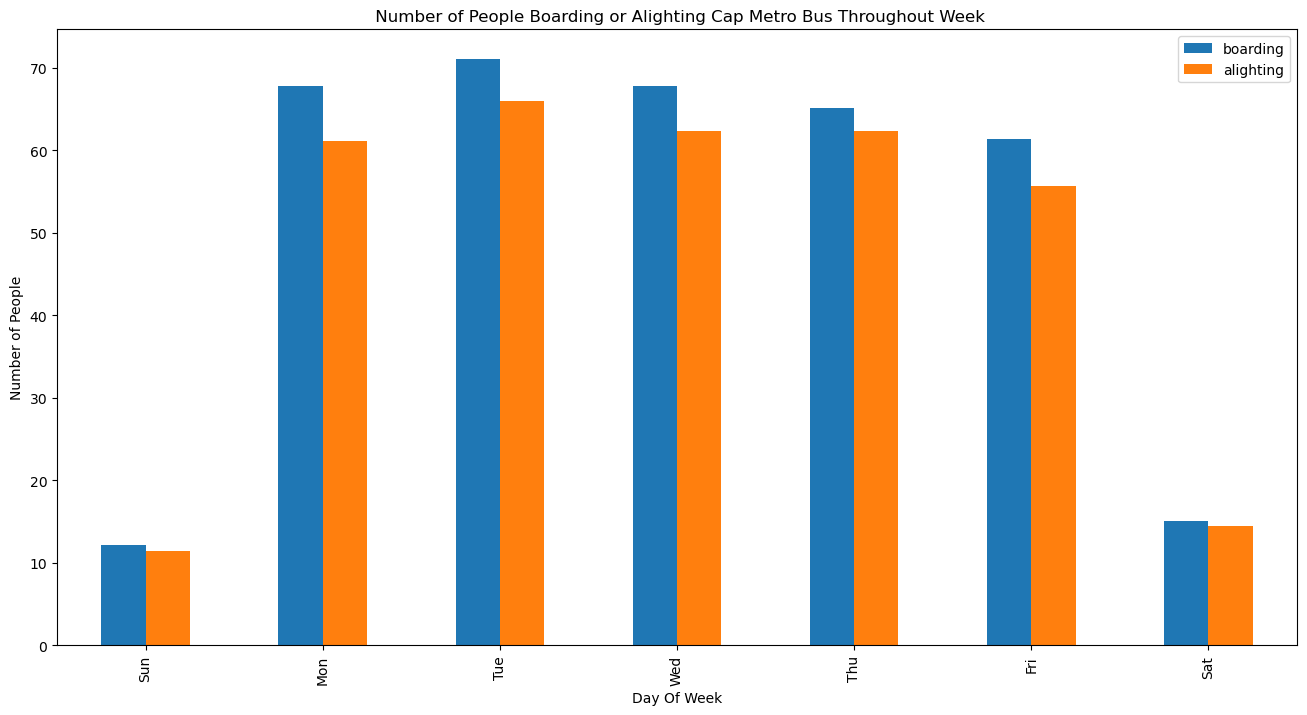

In [21]:
# get the average number of people getting on and off the bus for each day of the week
data2 = data.groupby(['day_of_week'])['boarding'].agg(['mean'])
data3 = data.groupby(['day_of_week'])['alighting'].agg(['mean'])
# merge the dataframe with average number of people getting on and average number of people getting off during each day of the week
data4 = data2.merge(data3, on = 'day_of_week')
# rename columns
data4.columns = ['boarding', 'alighting']
# reorder rows
data4 = data4.reindex(['Sun', 'Mon', 'Tue', 'Wed', "Thu", 'Fri', 'Sat'])
# plot the number of people getting on and off the bus each day of the week
data4.plot(kind = 'bar',  fontsize = 10, figsize = (16,8), xlabel = 'Day Of Week', ylabel = 'Number of People', title = ' Number of People Boarding or Alighting Cap Metro Bus Throughout Week')

We can see that the majority of bus traffic is during the week, which makes sense as those are the days where people have to go to class or go to work on campus. It appears that the day that sees the highest amount of bus traffic is Tuesday, and the day that sees the least is Sunday. We can also see that there are more people getting on the bus than off of it each day of the week.

We will finally look at how bus traffic progresses throughout an average year.

<Axes: title={'center': ' Number of People Boarding or Alighting Cap Metro Bus Throughout Year'}, xlabel='Day', ylabel='Number of People'>

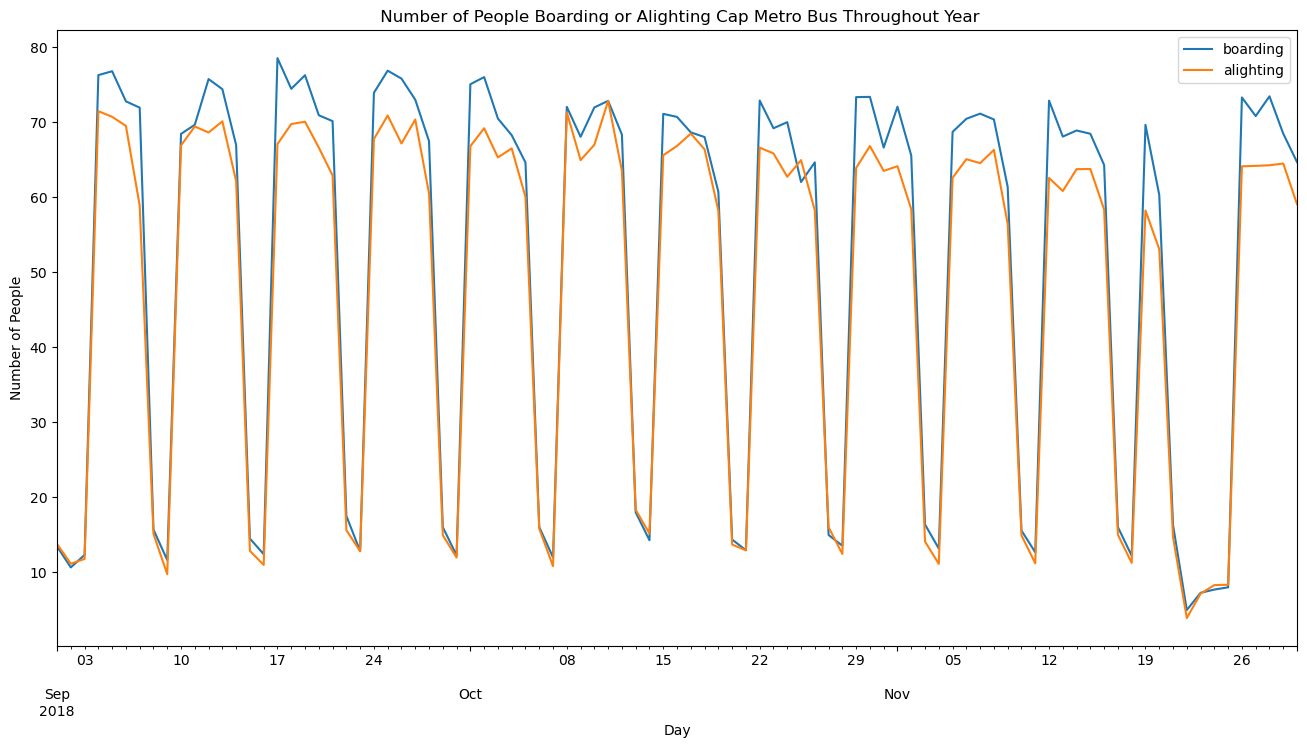

In [22]:
# get the series of all times data is recorded for
times = data['timestamp']
# take only the day
data['day'] = data['timestamp'].apply(lambda x: pd.to_datetime(x[:10], format = '%Y-%m-%d'))
# get the average number of people getting on and off the bus for each day
data2 = data.groupby(['day'])['boarding'].agg(['mean'])
data3 = data.groupby(['day'])['alighting'].agg(['mean'])
# merge the dataframe with average number of people getting on and average number of people getting off during each day
data4 = data2.merge(data3, on = 'day')
# rename columns
data4.columns = ['boarding', 'alighting']
# plot the number of people getting on and off the bus each day
data4.plot(kind = 'line',  fontsize = 10, figsize = (16,8), xlabel = 'Day', ylabel = 'Number of People', title = ' Number of People Boarding or Alighting Cap Metro Bus Throughout Year')

It is no surprise that we can see a peak for bus traffic during each week, followed by a sharp decrease during each weekend. There does not appear to be a ton of variance between weeks throughout the year, aside from an absolute minimum in the data set during the week of Thanksgiving. The highest levels of bus traffic appear to happen in September, as bus traffic slightly decreases throughout the year. There appears to be more people boarding the bus than getting off it across the board throughout the semester.

# Clustering and dimensionality reduction


/Users/cassieren/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


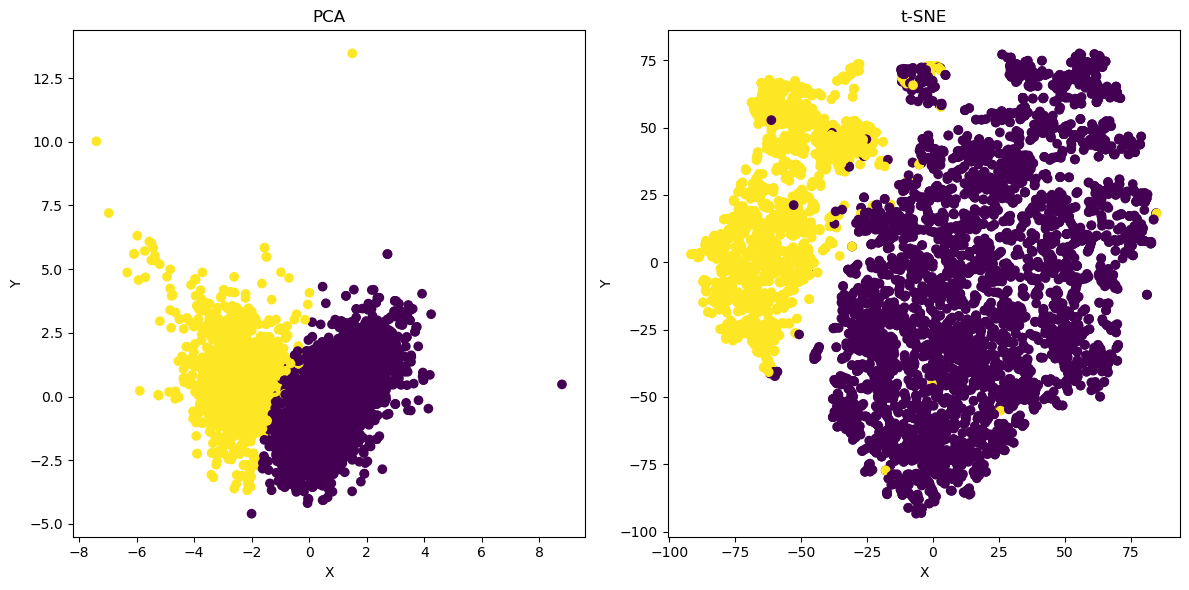

In [23]:
# import necessary packages
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
# read in dataframe
data = pd.read_csv("wine.csv")
# separate 11 chemical properties
X = data.drop(['color', 'quality'], axis=1)
# standardize chemical properties
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# run t-SNE
tsne = TSNE(n_components=2, perplexity=27.5, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
# run KMeans (clustering algortihm of my choice)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_scaled)
# plot results of PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('PCA')
plt.xlabel('X')
plt.ylabel('Y')
# plot results of tSNE
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title('t-SNE')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

Both dimensionality reduction techniques appear to make sense for this data. However, the PCA technique does appear to make slightly more sense as the two clusters are more distinct in separate in the PCA plor than they are in the tSNE plot where there are some points that appear to be misclassified.

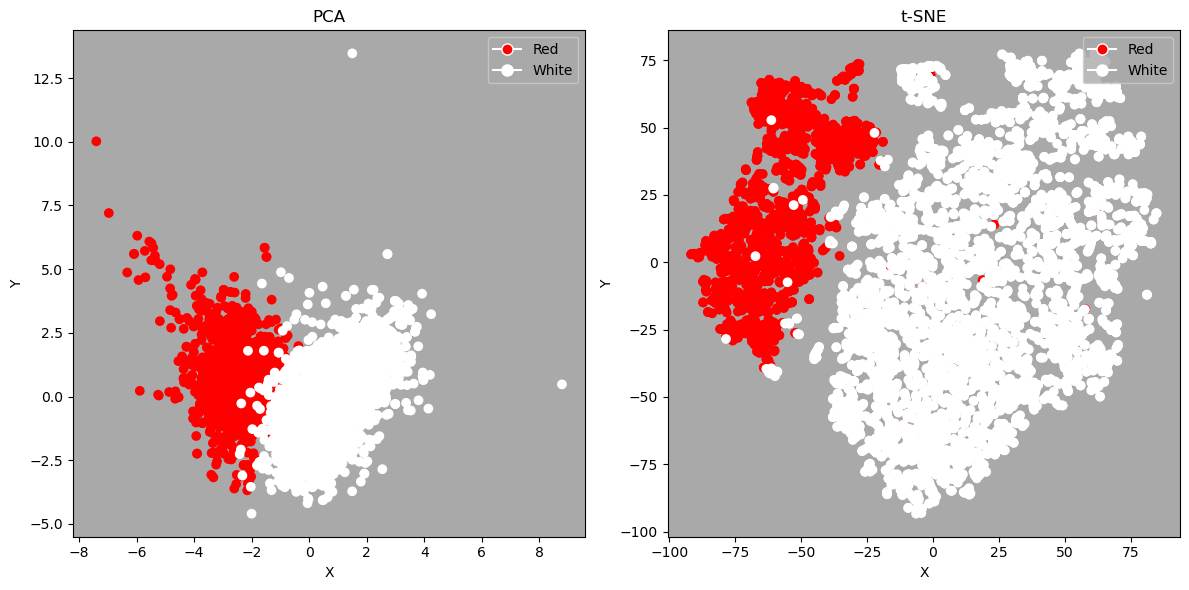

In [24]:
# import necessary packages for a legend
from matplotlib.lines import Line2D
# plot results of PCA
plt.rcParams['axes.facecolor'] = 'darkgray'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['color'])
plt.title('PCA')
plt.xlabel('X')
plt.ylabel('Y')
legend_elements_pca = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Red'),
                        Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=8, label='White')]
plt.legend(handles=legend_elements_pca, loc='upper right')
# plot results of tSNE
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['color'])
plt.title('t-SNE')
plt.xlabel('X')
plt.ylabel('Y')
legend_elements_pca = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Red'),
                        Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=8, label='White')]
plt.legend(handles=legend_elements_pca, loc='upper right')
plt.tight_layout()
plt.show()

As we can see, the split of red and white wines is very similar to the split decided by KNN after PCA was done on the dataset. The split of red and white wines is also very similar to the KNN split after tSNE was done on the dataset. Therefore, it is clear that my chosen approach, as well as the tSNE, are easily capable of distinguishing reds from whites.

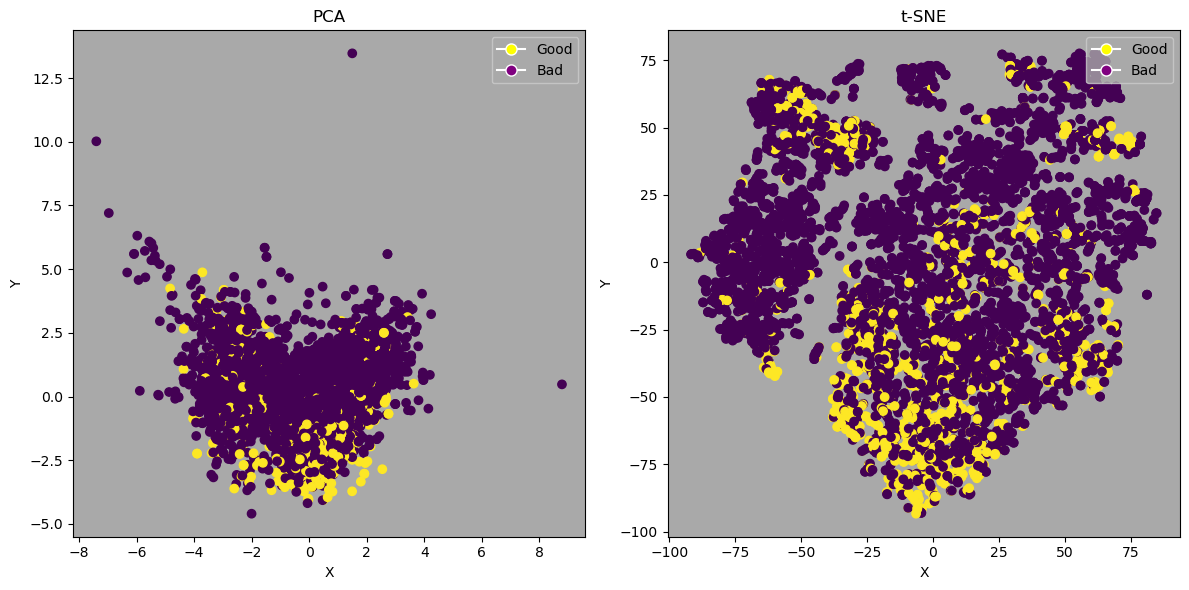

In [25]:
# split good wines from bad wines
data['good'] = data['quality'].apply(lambda x: x >= 7)
# plot results of PCA
plt.rcParams['axes.facecolor'] = 'darkgray'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['good'])
plt.title('PCA')
plt.xlabel('X')
plt.ylabel('Y')
legend_elements_pca = [Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=8, label='Good'),
                        Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=8, label='Bad')]
plt.legend(handles=legend_elements_pca, loc='upper right')
# plot results of tSNE
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['good'])
plt.title('t-SNE')
plt.xlabel('X')
plt.ylabel('Y')
legend_elements_pca = [Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=8, label='Good'),
                        Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=8, label='Bad')]
plt.legend(handles=legend_elements_pca, loc='upper right')
plt.tight_layout()
plt.show()

The split for good and bad wines is very different from the split of red and white wines, as well as the splits determined by PCA and tSNE combined with the KNN algorithm. Therefore, it is clear that my chosen approach, as well as the tSNE, are not easily capable of distinguishing reds from whites.

# Market Segmentation
on R!

# The Reuters Corpus

### Question
Can we predict whether an article is positive or negative based on how many times the article uses each of the 100 most common tokens across all articles

In [43]:
# importing necessary packages
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer
from collections import Counter
import numpy as np
import pandas as pd

nltk.download('punkt') # for tokenizing


# Helper function to read data from a labeled directory
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

# Reading the training and test data
train_texts, train_labels = read_data_from_directory("STA380/data/ReutersC50/C50train")
test_texts, test_labels = read_data_from_directory("STA380/data/ReutersC50/C50test")

[nltk_data] Downloading package punkt to /Users/cassieren/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Approach
We first create a train and test set. Each of the sets will have information on 2500 articles, 50 for each of the 50 authors. For each article, we will have a column for each of the 100 most common tokens that shows how many times each token was used in the article. We will then, train and fit a Gradient Boosting Decision Tree model on the training set, then test the model on the test set.

In [44]:
# import Sentiment Analyzer
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon', download_dir='/Users/cassieren/Documents/MSBA/Summer 2023/STA 380/David Puelz pt 2')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/cassieren/Documents/MSBA/Summer 2023/STA
[nltk_data]     380/David Puelz pt 2...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [45]:
# get polarity scores for train set
train_polarity_scores = []
for text in train_texts:
    if (sia.polarity_scores(text)['compound']) > 0:
        train_polarity_scores.append(True)
    else:
        train_polarity_scores.append(False)
#train_polarity_scores

In [46]:
# get polarity scores for test set
test_polarity_scores = []
for text in test_texts:
    if (sia.polarity_scores(text)['compound']) > 0:
        test_polarity_scores.append(True)
    else:
        test_polarity_scores.append(False)
#test_polarity_scores

In [47]:
# Helper function to tokenize, remove punctuation, and stem
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return stemmed_tokens


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cassieren/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
# preprocess all texts
texts = [(preprocess_text(text)) for text in (train_texts + test_texts)]

In [49]:
# get 100 most common tokens
all_tokens = [token for text in (train_texts + test_texts) for token in preprocess_text(text)]
common_tokens = Counter(all_tokens).most_common(100)

In [50]:
# find how many times each of most common tokens is in each article for train set
texts = [(preprocess_text(text)) for text in (train_texts)]
labels = np.zeros((len(common_tokens), len(train_labels)))
for i, token in enumerate(common_tokens):
    for j, text in enumerate(texts):
        words = texts[j]
        for word in words:
            if word in token[0]:
                #print(i,j)
                labels[i, j] += 1

In [51]:
# create training data frame with number of times each of most common tokens is in each article, as well as whether the article is positive or negative
labelsDF = pd.DataFrame({})
for i in range(len(labels)):
    labelsDF[common_tokens[i][0]] = labels[i]
labelsDF
happy = pd.DataFrame({'happy': (train_polarity_scores)})
traindf = happy.merge(labelsDF, left_index = True, right_index = True)
traindf

happy  said    's   ''   ``  year  compani  percent  would  million  \
0      True  14.0  12.0  4.0  4.0   2.0      8.0      7.0    2.0      2.0   
1      True  13.0  16.0  7.0  7.0   6.0      5.0      5.0    3.0      4.0   
2      True   5.0  14.0  3.0  3.0   1.0      3.0      0.0    0.0      1.0   
3      True   2.0   5.0  6.0  6.0   0.0      2.0      2.0    5.0      0.0   
4      True  10.0   8.0  4.0  4.0   0.0      0.0      5.0    4.0      0.0   
...     ...   ...   ...  ...  ...   ...      ...      ...    ...      ...   
2495   True   2.0   1.0  2.0  2.0   1.0     13.0     14.0    0.0      5.0   
2496   True   7.0   4.0  3.0  3.0   2.0      9.0     11.0    4.0      2.0   
2497   True   4.0   4.0  1.0  1.0   1.0     10.0     12.0    0.0      2.0   
2498   True   6.0   7.0  3.0  3.0   2.0     12.0     15.0    0.0      3.0   
2499  False   8.0   8.0  3.0  3.0   0.0      2.0     15.0    0.0      0.0   

      ...  secur  sinc  call  foreign  continu  still  develop  comput  \
0     ...    0.0   0.0   1.0      0.0      0.0    0.0      0.0     1.0   
1     ...    0.0   0.0   1.0      0.0      0.0    1.0      1.0     0.0   
2     ...    0.0   5.0   0.0      0.0      1.0    1.0      0.0     1.0   
3     ...    0.0   1.0   1.0      0.0      1.0    0.0      0.0     0.0   
4     ...    0.0   0.0   0.0      0.0      0.0    0.0      0.0     0.0   
...   ...    ...   ...   ...      ...      ...    ...      ...     ...   
2495  ...   14.0  15.0  13.0      0.0     14.0    0.0      0.0    14.0   
2496  ...    9.0  12.0   9.0      0.0     10.0    0.0      0.0     9.0   
2497  ...    9.0  11.0   9.0      0.0      9.0    0.0      1.0    10.0   
2498  ...   13.0  12.0  12.0      0.0     12.0    0.0      0.0    12.0   
2499  ...    2.0  11.0   1.0      0.0      1.0    0.0      0.0     1.0   

      around  gener  
0        0.0    0.0  
1        0.0    0.0  
2        1.0    1.0  
3        0.0    0.0  
4        0.0    0.0  
...      ...    ...  
2495     0.0    0.0  
2496     0.0    1.0  
2497     0.0    0.0  
2498     0.0    0.0  
2499     0.0    0.0  

[2500 rows x 101 columns]

In [52]:
# find how many times each of most common tokens is in each article for test set
texts = [(preprocess_text(text)) for text in (test_texts)]
labels = np.zeros((len(common_tokens), len(test_labels)))
for i, token in enumerate(common_tokens):
    for j, text in enumerate(texts):
        words = texts[j]
        for word in words:
            if word in token[0]:
                #print(i,j)
                labels[i, j] += 1

In [53]:
# create test data frame with number of times each of most common tokens is in each article, as well as whether the article is positive or negative
labelsDF = pd.DataFrame({})
for i in range(len(labels)):
    labelsDF[common_tokens[i][0]] = labels[i]
labelsDF
happy = pd.DataFrame({'happy': (test_polarity_scores)})
testdf = happy.merge(labelsDF, left_index = True, right_index = True)
testdf

happy  said    's   ''   ``  year  compani  percent  would  million  \
0      True   7.0  10.0  3.0  3.0   0.0     10.0      2.0    7.0      0.0   
1     False  10.0   7.0  5.0  5.0   0.0      1.0     12.0    9.0      1.0   
2     False  12.0   4.0  5.0  3.0   3.0      7.0      3.0    1.0      8.0   
3      True   7.0   7.0  4.0  4.0   4.0      5.0      0.0    1.0      0.0   
4      True   7.0   6.0  3.0  3.0   2.0      6.0      2.0    1.0      1.0   
...     ...   ...   ...  ...  ...   ...      ...      ...    ...      ...   
2495   True   4.0  11.0  5.0  5.0   1.0      2.0      1.0    4.0      0.0   
2496   True   2.0   3.0  1.0  1.0   0.0      1.0      4.0    1.0      1.0   
2497   True   7.0  16.0  5.0  5.0   1.0      6.0      6.0    6.0      6.0   
2498  False   6.0   4.0  4.0  4.0   0.0      4.0      2.0    1.0      2.0   
2499   True   4.0   6.0  2.0  2.0   0.0      1.0      2.0    0.0      2.0   

      ...  secur  sinc  call  foreign  continu  still  develop  comput  \
0     ...    1.0   1.0   1.0      0.0      0.0    0.0      0.0     0.0   
1     ...    1.0   0.0   0.0      0.0      0.0    0.0      0.0     1.0   
2     ...    0.0   0.0   2.0      0.0      1.0    1.0      1.0     0.0   
3     ...    1.0   1.0   1.0      0.0      2.0    1.0      0.0     1.0   
4     ...    0.0   5.0   1.0      0.0      1.0    1.0      0.0     1.0   
...   ...    ...   ...   ...      ...      ...    ...      ...     ...   
2495  ...    0.0   1.0   0.0      0.0      1.0    0.0      1.0     1.0   
2496  ...    2.0   1.0   1.0      0.0      1.0    0.0      0.0     1.0   
2497  ...    5.0   7.0   5.0      0.0      7.0    0.0      0.0     6.0   
2498  ...    2.0   5.0   2.0      4.0      2.0    0.0      0.0     2.0   
2499  ...    1.0   1.0   1.0      0.0      2.0    0.0      0.0     1.0   

      around  gener  
0        0.0    0.0  
1        0.0    0.0  
2        0.0    1.0  
3        0.0    1.0  
4        0.0    1.0  
...      ...    ...  
2495     0.0    0.0  
2496     0.0    0.0  
2497     0.0    1.0  
2498     0.0    0.0  
2499     0.0    0.0  

[2500 rows x 101 columns]

In [54]:
# create X_train, y_train, X_test, y_test
X_train = traindf.drop(['happy'], axis = 1)
y_train = traindf['happy']
X_test =  testdf.drop(['happy'], axis = 1)
y_test = testdf['happy']

In [55]:
# create model
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=200,
                               max_depth=4,
                               random_state=1)

In [56]:
# fit model
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=200, random_state=1)

In [57]:
# test model
from sklearn import metrics
prediction_test = model.predict(X_test)
accuracy_test = metrics.accuracy_score(y_test, prediction_test)
accuracy_test

0.7588

### Results
Our initial model is able to predict whether the article is positive or negative with an accuracy of 75.88%. 

<Axes: xlabel='Number of trees in ensemble', ylabel='Test accuracy'>

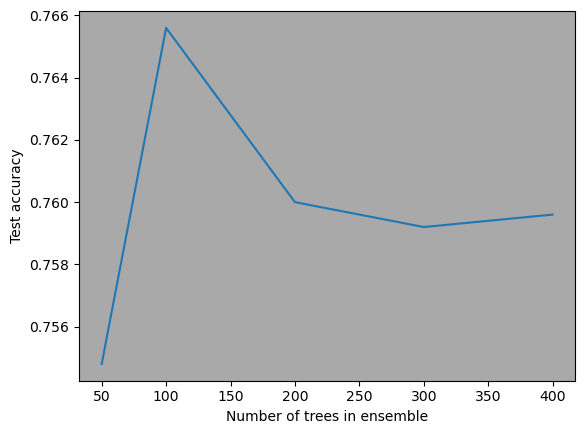

In [59]:
# testing different values for number of trees to see which value should produce the highest accuracy
from pandas import Series, DataFrame
scores = {}
for num_trees in [50, 100, 200, 300, 400]:
    model = GradientBoostingClassifier(n_estimators=num_trees,
                                       max_depth=2,
                                       random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[num_trees] = accuracy_test
Series(scores).sort_index().plot(xlabel = 'Number of trees in ensemble', ylabel = 'Test accuracy')

<Axes: xlabel='Depth of trees in ensemble', ylabel='Test accuracy'>

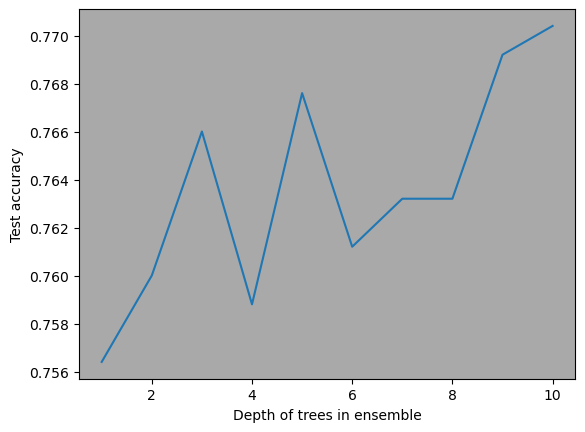

In [60]:
# testing different values for maximum depth to see which value should produce the highest accuracy
scores = {}
for depth in range(1, 11):
    model = GradientBoostingClassifier(n_estimators=200,
                                       max_depth=depth,
                                       random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[depth] = accuracy_test
Series(scores).sort_index().plot(xlabel = 'Depth of trees in ensemble', ylabel = 'Test accuracy')

However, after testing other values for the number of trees selected and the maximum depth of the trees, we can see that a model with a max depth of 10 and 100 trees would work better. We will rerun the model with these values.

In [62]:
# rerunning the model with the values we found
model = GradientBoostingClassifier(n_estimators=100,
                               max_depth=10,
                               random_state=1)
model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
accuracy_test = metrics.accuracy_score(y_test, prediction_test)
accuracy_test

0.7636

Our new model is now  able to predict whether the article is positive or negative with an accuracy of 76.36%. We will now look at which words have a large difference between their usage in the positive articles and in the negative articles, in order to try to decipher which words are model relies in to make its classifications. 

In [63]:
# find the percent change in the average usage of a word when the article is positive instead of negative
df = pd.concat([traindf, testdf], axis = 0)
df = df.groupby(['happy']).mean().T
df['change'] = (df[True] - df[False])*(100/df[False])
df

happy       False      True     change
said     8.189212  8.081950  -1.309793
's       6.012448  6.046377   0.564307
''       5.688797  5.620026  -1.208873
``       5.661411  5.573650  -1.550166
year     2.004979  2.628722  31.109686
...           ...       ...        ...
still    0.440664  0.466930   5.960613
develop  0.466390  0.621080  33.167588
comput   0.687137  1.110935  61.675991
around   0.455602  0.515415  13.128433
gener    0.385892  0.470619  21.956168

[100 rows x 3 columns]

<Axes: >

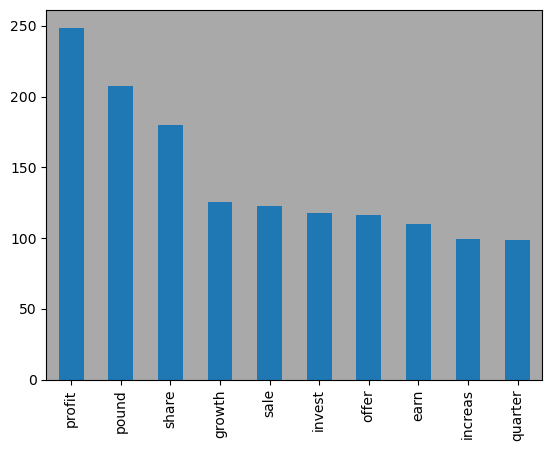

In [64]:
# graph the 10 words that are used the most in positive articles when compared to negative articles
df['change'].sort_values(ascending = False)[:10].plot(kind = 'bar')

<Axes: >

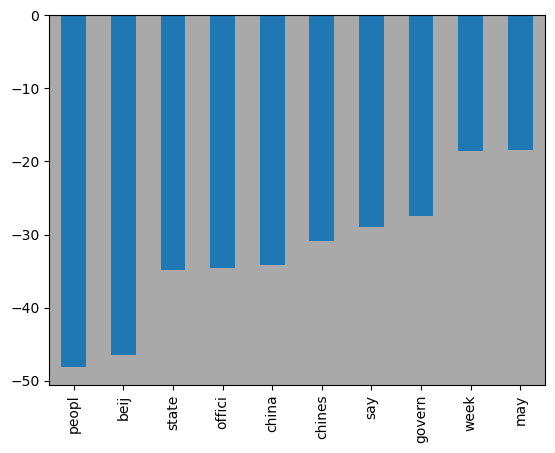

In [65]:
# graph the 10 words that are used the most in positive articles when compared to negative articles
df['change'].sort_values(ascending = True)[:10].plot(kind = 'bar')

### Conclusion

Our most accurate model produces an accuracy of 76.36% when attempting to predict whether an article is positive or negative based on the usage of the 100 most common tokens across the entire data set. Furthermore, we found that the tokens profit, pound, share, growth and sale, among others, were used over 100% more in positive articles than negative articles. On the other hand, we found that tokens like peopl, state, china and govern, among others, were used over 25% less in positive articles than negative articles. Stakeholders in a publishing company can use this information when deciding how they want their articles to be worded. For example, if they want to produce a positive article because the public is responding to positivity, they can make sure to word their article in a way that showcases the growth, profits and sales of the topic they are writing about. However, if they think the public will respond to more negativity, they can word their article to focus on people, the government, or unfriendly foreign states, such as China.

# Association rule mining


On R!

# Image classification with neural networks


In [66]:
import torch
import os
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import tqdm


In [67]:

# Define the path to your dataset
dataset_path = 'STA380/data/EuroSAT_RGB'  

# Load the ImageFolder dataset
dataset = torchvision.datasets.ImageFolder(dataset_path)

# Retrieve the class labels
class_labels = dataset.classes
print(class_labels)

['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


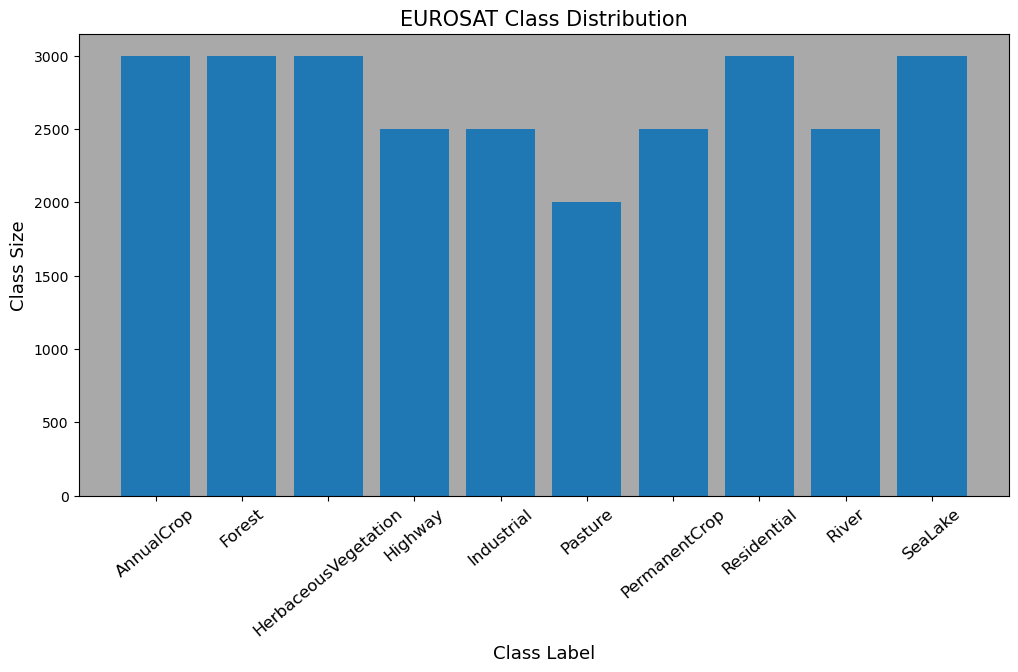

In [68]:
class_counts = {}
for _, label in dataset:
    class_name = dataset.classes[label]
    if class_name not in class_counts:
        class_counts[class_name] = 0
    class_counts[class_name] += 1

# Plot the class distribution
plt.figure(figsize=(12, 6))
plt.bar(range(len(class_counts)), list(class_counts.values()), align='center')
plt.xticks(range(len(class_counts)), list(class_counts.keys()), fontsize=12, rotation=40)
plt.xlabel('Class Label', fontsize=13)
plt.ylabel('Class Size', fontsize=13)
plt.title('EUROSAT Class Distribution', fontsize=15)
plt.show()

In [69]:
from torchvision import transforms, datasets

# Define your desired transformations for EuroSAT
# transform = transforms.Compose([
#     transforms.Resize((64, 64)),  # Adjust to the size of your images
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])


# Load and create data loaders for EuroSAT
eurosat_dataset = datasets.ImageFolder(dataset_path, transform=transform)
train_size = int(0.8 * len(eurosat_dataset))
test_size = len(eurosat_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(eurosat_dataset, [train_size, test_size])

batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

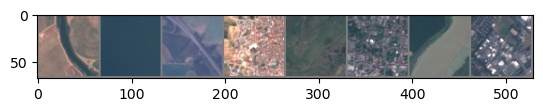

Labels: AnnualCrop Forest HerbaceousVegetation Highway Industrial Pasture PermanentCrop Residential


In [75]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training images and display them
dataiter = iter(train_loader)  # Use your EuroSAT train_loader here
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:8]))
print('Labels:', ' '.join(class_labels[j] for j in range(8)))


In [76]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)  # in_channels, out_channels, kernel_size, stride
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)  # Each channel gets zeroed out independently on each forward call with probability p
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(57600, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)



Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=57600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [77]:

# Set the device to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())


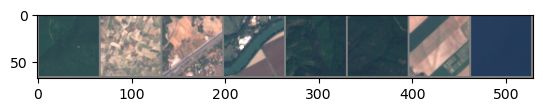

Predicted: 5 6 6 3 1 1 0 9
Actual: 5 6 6 3 1 1 0 9


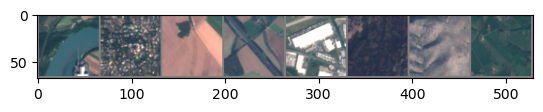

Predicted: 8 7 0 3 4 2 2 5
Actual: 8 7 0 3 4 2 2 5


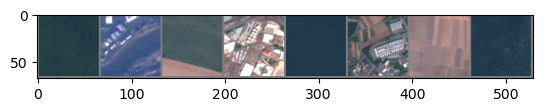

Predicted: 1 4 0 4 1 4 0 1
Actual: 1 4 0 4 1 4 0 1


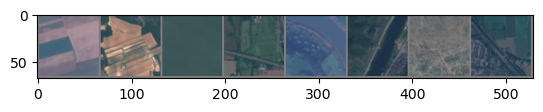

Predicted: 0 6 9 5 5 3 2 2
Actual: 0 6 9 5 5 3 2 2


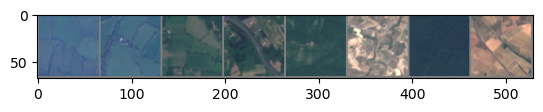

Predicted: 5 5 5 3 5 6 1 6
Actual: 5 5 5 3 5 6 1 6


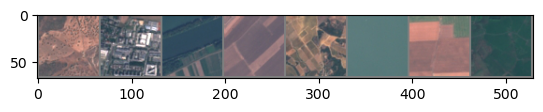

Predicted: 6 4 8 0 6 9 0 5
Actual: 6 4 8 0 6 9 0 5


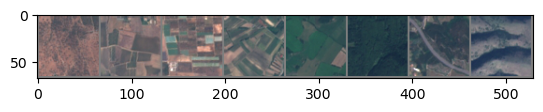

Predicted: 6 6 6 6 5 1 3 8
Actual: 6 6 6 6 5 1 3 8


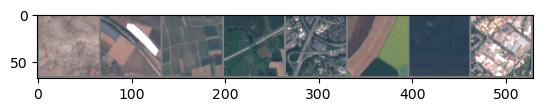

Predicted: 0 4 0 3 3 0 1 4
Actual: 0 4 0 3 3 0 1 4


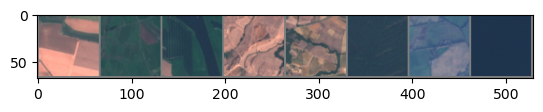

Predicted: 0 5 1 6 6 9 5 9
Actual: 0 5 1 6 6 9 5 9


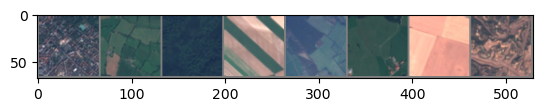

Predicted: 7 0 1 0 5 5 0 6
Actual: 7 0 1 0 5 5 0 6


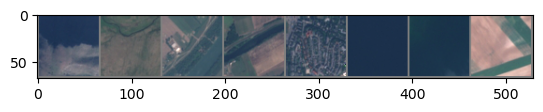

Predicted: 8 2 8 6 7 9 9 0
Actual: 8 2 8 6 7 9 9 0


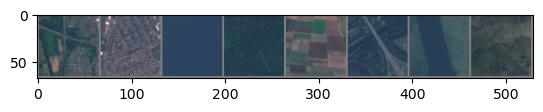

Predicted: 2 7 9 1 2 8 8 2
Actual: 2 7 9 1 2 8 8 2


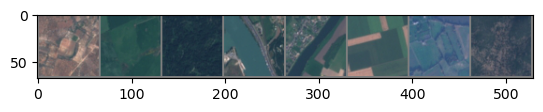

Predicted: 6 5 1 8 8 0 5 2
Actual: 6 5 1 8 8 0 5 2


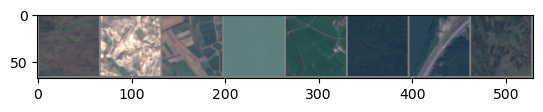

Predicted: 2 2 6 9 5 1 8 2
Actual: 2 2 6 9 5 1 8 2


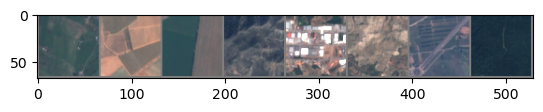

Predicted: 5 6 0 2 4 6 7 1
Actual: 5 6 0 2 4 6 7 1


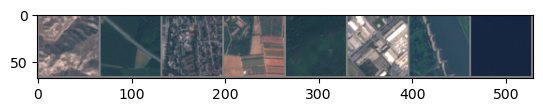

Predicted: 6 8 7 6 1 4 3 9
Actual: 6 8 7 6 1 4 3 9


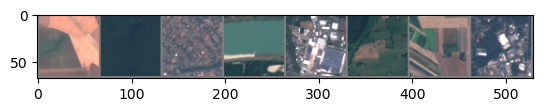

Predicted: 0 9 7 8 4 2 0 4
Actual: 0 9 7 8 4 2 0 4
Epoch 1, Loss: 0.6604934931683117
Accuracy of network on test images: 75.73529411764706


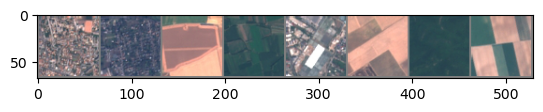

Predicted: 7 7 0 8 4 0 5 0
Actual: 7 7 0 8 4 0 5 0


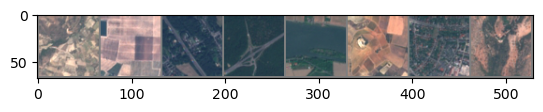

Predicted: 6 6 3 3 8 6 7 3
Actual: 6 6 3 3 8 6 7 3


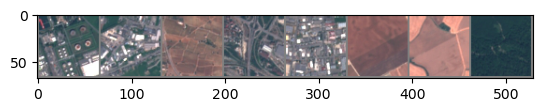

Predicted: 4 4 6 4 4 0 0 1
Actual: 4 4 6 4 4 0 0 1


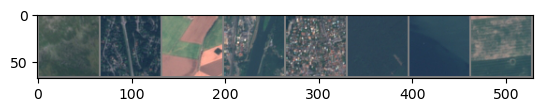

Predicted: 2 7 0 8 7 1 1 6
Actual: 2 7 0 8 7 1 1 6


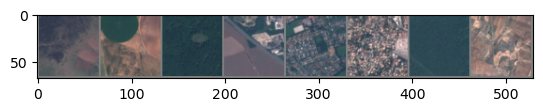

Predicted: 2 0 1 3 7 7 1 6
Actual: 2 0 1 3 7 7 1 6


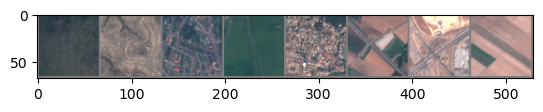

Predicted: 2 2 7 1 7 3 7 0
Actual: 2 2 7 1 7 3 7 0


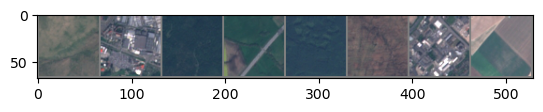

Predicted: 2 4 1 3 1 2 4 0
Actual: 2 4 1 3 1 2 4 0


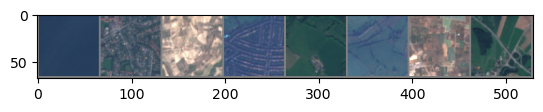

Predicted: 9 7 6 7 5 5 6 3
Actual: 9 7 6 7 5 5 6 3


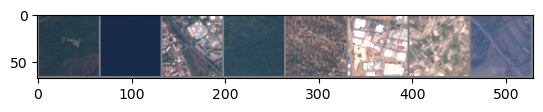

Predicted: 1 9 3 8 2 4 2 3
Actual: 1 9 3 8 2 4 2 3


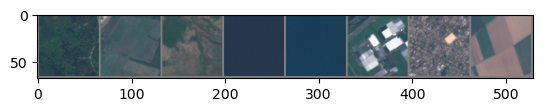

Predicted: 5 0 5 9 9 4 7 0
Actual: 5 0 5 9 9 4 7 0


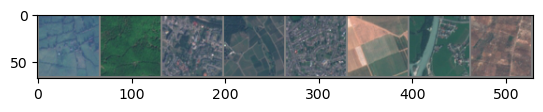

Predicted: 5 0 7 3 7 0 3 2
Actual: 5 0 7 3 7 0 3 2


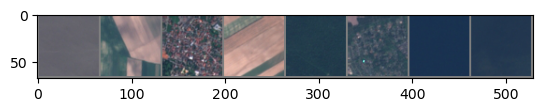

Predicted: 9 0 7 0 9 7 9 9
Actual: 9 0 7 0 9 7 9 9


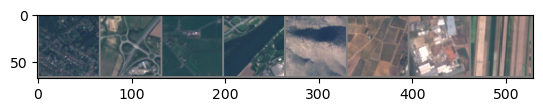

Predicted: 7 3 8 3 6 6 4 6
Actual: 7 3 8 3 6 6 4 6


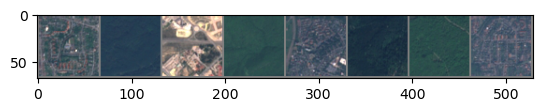

Predicted: 7 1 2 1 7 1 5 7
Actual: 7 1 2 1 7 1 5 7


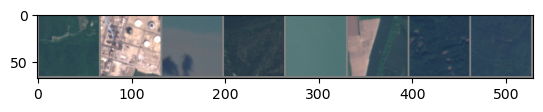

Predicted: 8 3 0 2 9 0 1 9
Actual: 8 3 0 2 9 0 1 9


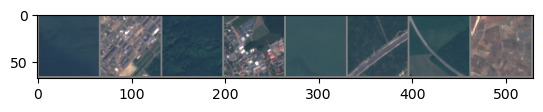

Predicted: 9 7 1 7 9 3 3 6
Actual: 9 7 1 7 9 3 3 6


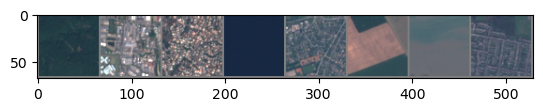

Predicted: 1 4 7 9 7 0 9 7
Actual: 1 4 7 9 7 0 9 7
Epoch 2, Loss: 0.5880938914753276
Accuracy of network on test images: 75.0


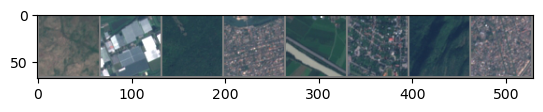

Predicted: 2 4 1 7 8 7 2 7
Actual: 2 4 1 7 8 7 2 7


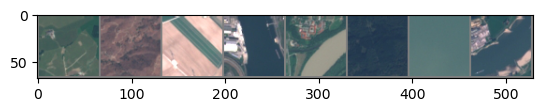

Predicted: 2 2 0 8 8 9 9 8
Actual: 2 2 0 8 8 9 9 8


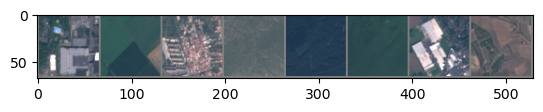

Predicted: 4 0 4 2 9 1 4 6
Actual: 4 0 4 2 9 1 4 6


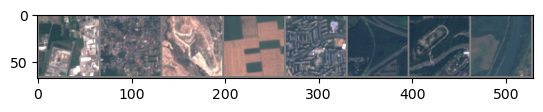

Predicted: 7 7 4 0 7 8 4 8
Actual: 7 7 4 0 7 8 4 8


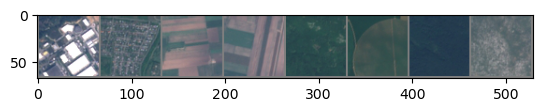

Predicted: 4 7 0 0 1 5 1 2
Actual: 4 7 0 0 1 5 1 2


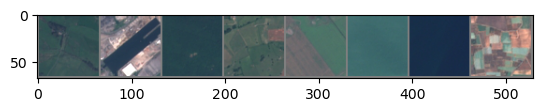

Predicted: 5 8 1 5 9 9 9 6
Actual: 5 8 1 5 9 9 9 6


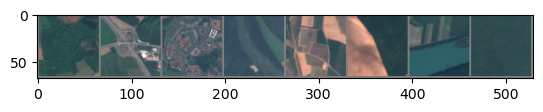

Predicted: 5 3 7 8 6 0 8 1
Actual: 5 3 7 8 6 0 8 1


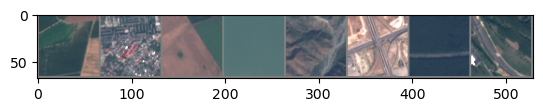

Predicted: 8 7 0 9 2 7 8 3
Actual: 8 7 0 9 2 7 8 3


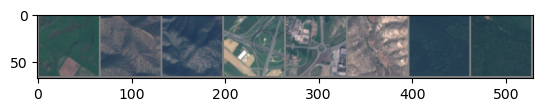

Predicted: 5 2 8 4 7 2 1 1
Actual: 5 2 8 4 7 2 1 1


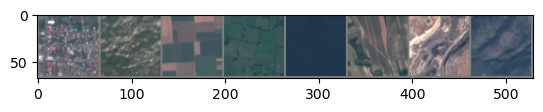

Predicted: 7 6 0 1 9 6 3 6
Actual: 7 6 0 1 9 6 3 6


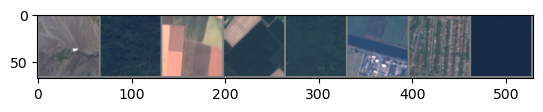

Predicted: 2 1 0 8 9 3 7 9
Actual: 2 1 0 8 9 3 7 9


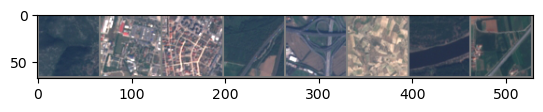

Predicted: 8 4 7 3 4 6 2 3
Actual: 8 4 7 3 4 6 2 3


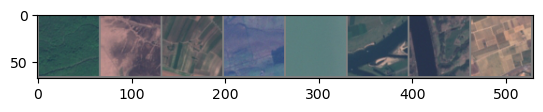

Predicted: 5 2 6 8 9 8 2 6
Actual: 5 2 6 8 9 8 2 6


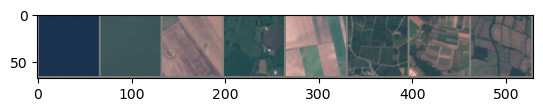

Predicted: 9 9 0 3 0 6 6 6
Actual: 9 9 0 3 0 6 6 6


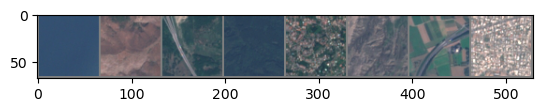

Predicted: 9 2 3 1 7 2 3 7
Actual: 9 2 3 1 7 2 3 7


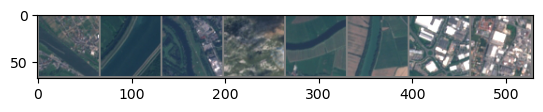

Predicted: 3 8 8 3 8 8 4 4
Actual: 3 8 8 3 8 8 4 4


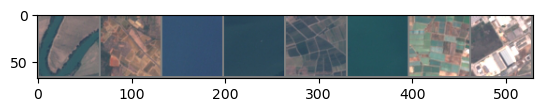

Predicted: 0 6 9 9 2 9 6 4
Actual: 0 6 9 9 2 9 6 4
Epoch 3, Loss: 0.505726304764931
Accuracy of network on test images: 73.52941176470588


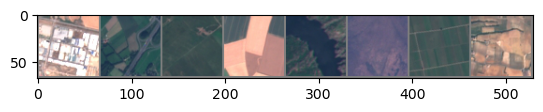

Predicted: 4 3 2 0 8 2 6 6
Actual: 4 3 2 0 8 2 6 6


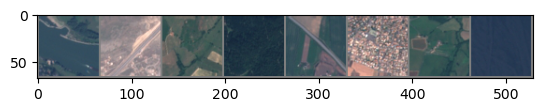

Predicted: 3 2 6 1 3 7 6 9
Actual: 3 2 6 1 3 7 6 9


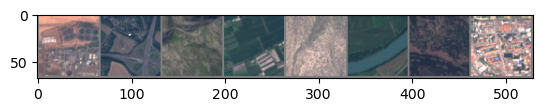

Predicted: 2 3 6 3 2 8 2 7
Actual: 2 3 6 3 2 8 2 7


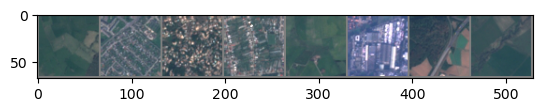

Predicted: 5 4 7 7 5 4 3 5
Actual: 5 4 7 7 5 4 3 5


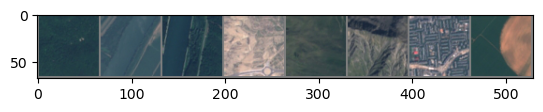

Predicted: 1 8 8 6 1 6 7 0
Actual: 1 8 8 6 1 6 7 0


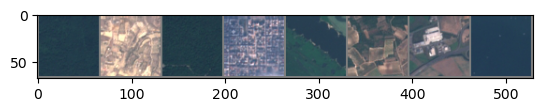

Predicted: 9 2 1 4 8 6 4 9
Actual: 9 2 1 4 8 6 4 9


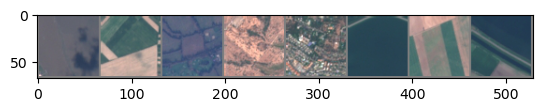

Predicted: 0 0 3 2 7 5 0 8
Actual: 0 0 3 2 7 5 0 8


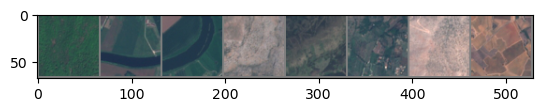

Predicted: 1 8 1 2 2 3 2 6
Actual: 1 8 1 2 2 3 2 6


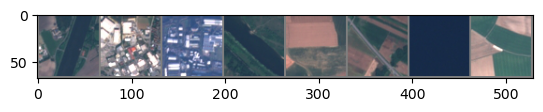

Predicted: 8 4 4 8 0 3 9 0
Actual: 8 4 4 8 0 3 9 0


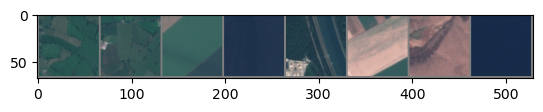

Predicted: 5 5 9 9 8 0 0 9
Actual: 5 5 9 9 8 0 0 9


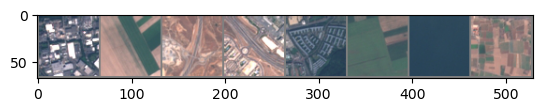

Predicted: 4 0 6 3 7 5 9 6
Actual: 4 0 6 3 7 5 9 6


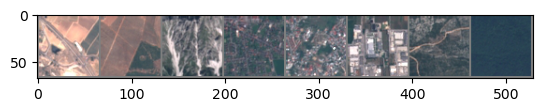

Predicted: 3 0 4 7 7 4 6 1
Actual: 3 0 4 7 7 4 6 1


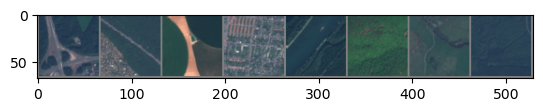

Predicted: 3 3 0 7 8 1 2 1
Actual: 3 3 0 7 8 1 2 1


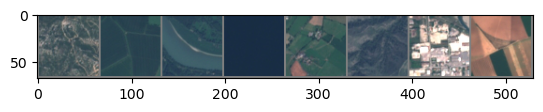

Predicted: 7 1 8 9 8 2 4 0
Actual: 7 1 8 9 8 2 4 0


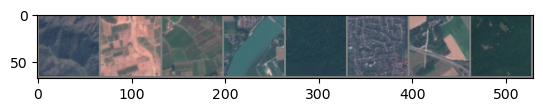

Predicted: 8 6 6 8 1 7 6 2
Actual: 8 6 6 8 1 7 6 2


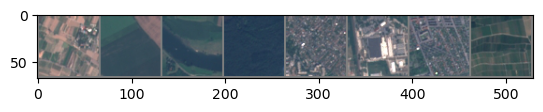

Predicted: 2 9 8 9 7 4 7 2
Actual: 2 9 8 9 7 4 7 2


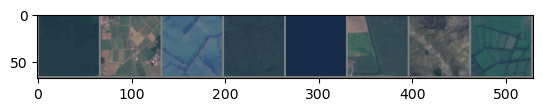

Predicted: 1 6 5 1 9 5 2 1
Actual: 1 6 5 1 9 5 2 1
Epoch 4, Loss: 0.452171748647323
Accuracy of network on test images: 69.11764705882354


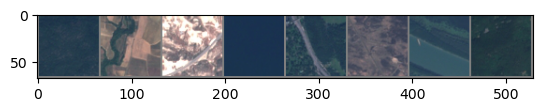

Predicted: 1 8 4 9 3 2 8 1
Actual: 1 8 4 9 3 2 8 1


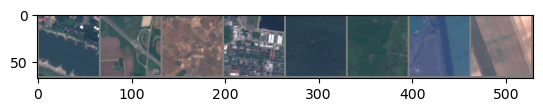

Predicted: 8 3 6 4 1 1 5 0
Actual: 8 3 6 4 1 1 5 0


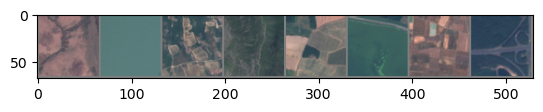

Predicted: 0 9 6 2 0 9 2 8
Actual: 0 9 6 2 0 9 2 8


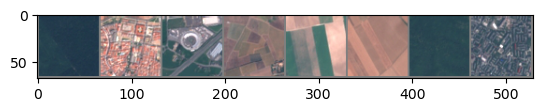

Predicted: 1 7 4 6 0 0 1 7
Actual: 1 7 4 6 0 0 1 7


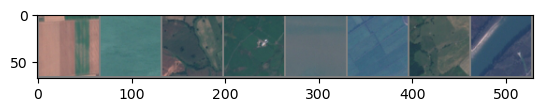

Predicted: 0 9 6 5 9 5 5 8
Actual: 0 9 6 5 9 5 5 8


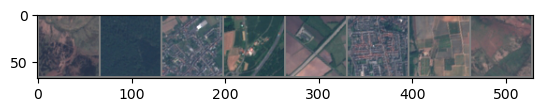

Predicted: 2 1 7 3 3 7 6 2
Actual: 2 1 7 3 3 7 6 2


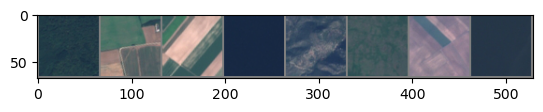

Predicted: 1 0 0 9 8 5 0 9
Actual: 1 0 0 9 8 5 0 9


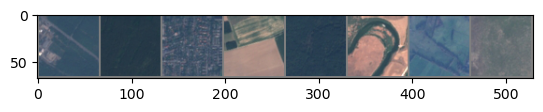

Predicted: 8 1 7 0 1 0 5 2
Actual: 8 1 7 0 1 0 5 2


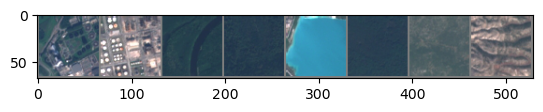

Predicted: 3 4 1 1 4 1 2 2
Actual: 3 4 1 1 4 1 2 2


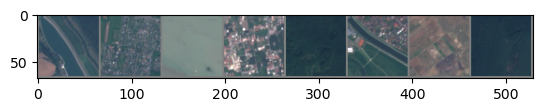

Predicted: 3 7 9 7 1 3 2 9
Actual: 3 7 9 7 1 3 2 9


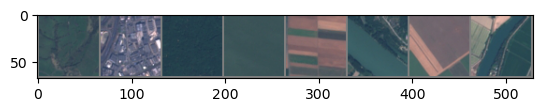

Predicted: 5 4 1 9 0 8 0 8
Actual: 5 4 1 9 0 8 0 8


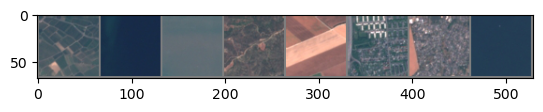

Predicted: 6 9 9 6 0 7 7 9
Actual: 6 9 9 6 0 7 7 9


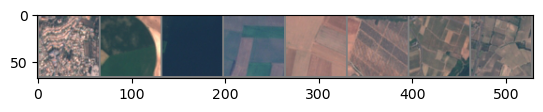

Predicted: 2 0 9 0 0 6 6 6
Actual: 2 0 9 0 0 6 6 6


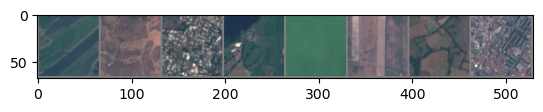

Predicted: 8 6 7 8 9 0 0 7
Actual: 8 6 7 8 9 0 0 7


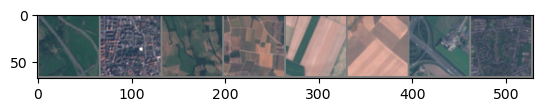

Predicted: 3 7 6 6 0 0 3 7
Actual: 3 7 6 6 0 0 3 7


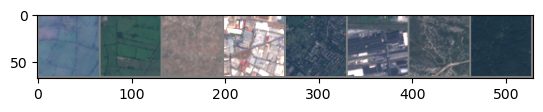

Predicted: 5 5 2 4 7 4 6 1
Actual: 5 5 2 4 7 4 6 1


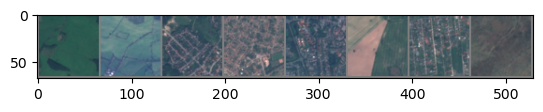

Predicted: 1 8 7 7 7 0 7 2
Actual: 1 8 7 7 7 0 7 2
Epoch 5, Loss: 0.3871123918150304
Accuracy of network on test images: 77.94117647058823
Finished Training


In [80]:

# Number of training epochs
num_epochs = 5

testiter = iter(test_loader)
# Main training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    count_correct = 0
    total = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 20 == 0:
            with torch.no_grad():
                # Show a sample of images from the test data and model's predictions
                #test_images, test_labels = testiter.next()
                test_images, test_labels = next(testiter)
                test_images, test_labels = test_images.to(device), test_labels.to(device)

                imshow(torchvision.utils.make_grid(test_images[:8].cpu()))
                test_outputs = net(test_images[:8])
                _, predicted = torch.max(test_outputs, 1)
                total += test_labels[:8].size(0) # check if count is ok to use
                count_correct += (predicted == test_labels[:8]).sum().item()
                print('Predicted:', ' '.join('%d' % predicted[j] for j in range(8)))
                print('Actual:', ' '.join('%d' % predicted[j] for j in range(8)))


    # Print average loss for the epoch
    print(f"Epoch {epoch+1}, Loss: {running_loss / (i+1)}")
    print('Accuracy of network on test images:', (100*count_correct/total))


print('Finished Training')

In [81]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on test set: {accuracy:.2f}%")

Accuracy on test set: 78.87%


In [82]:
from sklearn.metrics import confusion_matrix

all_predicted = []
all_actual = []

with torch.no_grad():
    for data in test_loader:
        test_images, test_labels = data
        test_images, test_labels = test_images.to(device), test_labels.to(device)
        test_outputs = net(test_images)
        _, predicted = torch.max(test_outputs, 1)

        all_predicted.extend(predicted.cpu().numpy())
        all_actual.extend(test_labels.cpu().numpy())

confusion = confusion_matrix(all_actual, all_predicted)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[497   2  11  12   0  12  40   0  20  19]
 [  0 546   7   1   0  18   3   0   5  17]
 [  7   8 414  17   5  14  79  31  15  10]
 [ 11   1  23 294  21   5  59  34  45   0]
 [  0   0   0  14 444   0   4  43   1   0]
 [  5  24  30  12   0 264  31   1  18   6]
 [ 17   2  70  22   5   4 387   5  13   0]
 [  0   0   7   8  10   2   1 565   2   0]
 [ 16  22  12  65   3  13  12   2 337   5]
 [ 11   7   1   2   0   5   0   0   8 559]]
